### Project: Computational models for robot-induced hallucinations in Parkinson’s Disease
### Laboratory of Cognitive Neuroscience - LNCO
### Author: Duarte Rodrigues
##### Script: This document is an exact copy of maDLC_Train_Eval.ipynb and it is useful if you want to train 2 models at the same time, in different tabs of the browser. It is useful if you want to save time. BE AWARE! The computer will have all the cores/CPU/GPU being used, so it will not be capable of doing anything else (even moving the mouse sometimes)!

##### The code is not commented, but it works exaclty the same way as the other notebook.

## THIS DOCUMENT SHOULD BE RUN IN THE ONLINE JUPYTER NOTEBOOK PLATFORM!! (not on vscode)

In [1]:
import deeplabcut
print(deeplabcut.__version__)

2.2.0.6


In [2]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Tk().withdraw()
config_path = askopenfilename(title='Choose the config.yaml file', initialdir='D:\_users\Duarte_Projects') # show an "Open" dialog box and return the path to the selected file

print(config_path)

D:/_users/Duarte_Projects/maLD_Crop-Duarte-2022-06-10/config.yaml


In [11]:
deeplabcut.check_labels(config_path, visualizeindividuals=False)
print('done checking')

Creating images with labels by Duarte.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:01<00:00, 13.82it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!
done checking


This script can be broken up here, since the next step should only be run in the place where the training will happen
only change the project_path on the config file

In [3]:
# config_path = r"C:\Users\duteixei\Desktop\Camera_angles\Second_Diagonal_Left-Duarte-2022-03-18\config.yaml" # EXAMPLE

deeplabcut.create_multianimaltraining_dataset(config_path)

#next step edit the pose_cfg of the train - by hand
#set the batch_size for the imgaug in the pose_cfg.yaml - used batch=8

Utilizing the following graph: [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [3, 11], [3, 12], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [4, 11], [4, 12], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [8, 9], [8, 10], [8, 11], [8, 12], [9, 10], [9, 11], [9, 12], [10, 11], [10, 12], [11, 12]]
Creating training data for: Shuffle: 1 TrainFraction:  0.95


100%|███████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 538.00it/s]


The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


Define the arguments on the pose_cfg.yaml

In [4]:
cfg = deeplabcut.auxiliaryfunctions.read_plainconfig(config_path)

net_type = cfg['default_net_type']
project_path = cfg['project_path']
init_weights = r"D:\_users\Duarte_Projects\ma_RD-Duarte-2022-06-17\dlc-models\iteration-0\ma_RDJun17-trainset95shuffle1\train\snapshot-500000"#'D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt'
batch_size = 1
multi_step_ar = [[0.0001, 10000], [5e-05, 20000], [1e-05, 500000]]
 ### use DLCR50
if net_type == 'resnet_50':
    stride = 4
    smfactor = 4
    multi_stage = True
### use efficientnet-b7-s4
elif net_type == 'efficientnet-b7':
    stride = 4
    smfactor = 4
    multi_stage = False

In [5]:
train_cfg, test_cfg, snapshotfolder = deeplabcut.return_train_network_path(
    config_path,
    shuffle=1,
    trainingsetindex=0,
)

# print(train_cfg)
cfg_dlc = deeplabcut.auxiliaryfunctions.read_plainconfig(train_cfg)
cfg_dlc["stride"] = int(stride)
cfg_dlc["net_type"] = str(net_type)
cfg_dlc["multi_stage"] = multi_stage
cfg_dlc["smfactor"] = smfactor
cfg_dlc["init_weights"] = init_weights
cfg_dlc['project_path'] = project_path
cfg_dlc['batch_size'] = batch_size
cfg_dlc['multi_step'] = multi_step_ar
deeplabcut.auxiliaryfunctions.write_plainconfig(train_cfg, cfg_dlc)


cfg_dlc = deeplabcut.auxiliaryfunctions.read_plainconfig(test_cfg)
cfg_dlc["stride"] = int(stride)
cfg_dlc["net_type"] = str(net_type)
cfg_dlc["multi_stage"] = multi_stage
cfg_dlc["smfactor"] = smfactor
cfg_dlc["init_weights"] = init_weights
cfg_dlc['project_path'] = project_path
cfg_dlc['batch_size'] = batch_size
cfg_dlc['multi_step'] = multi_step_ar
deeplabcut.auxiliaryfunctions.write_plainconfig(test_cfg, cfg_dlc)

In [6]:
# Allow_growth=true  ->  important not to allocate instantly all the GPU memmory
#As this is using the pre_trained human model, the number of output layers are diferent -> keepdeconvweights=False
deeplabcut.train_network(config_path, shuffle=1, trainingsetindex=0, max_snapshots_to_keep=7, autotune=False, displayiters=100, saveiters=50000, maxiters=500000, gputouse=0, allow_growth=True, keepdeconvweights=False)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12]],
 'all_joints_names': ['finger1',
                      'wrist1',
                      'elbow1',
                      'shoulder1',
                      'finger2',
                      'wrist2',
                      'elbow2',
                      'shoulder2',
                      'chin',
                      'robot_joint',
                      'robot_top',
                      'robot_base',
                      'robot_logo'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'clahe': True,
 'claheratio': 0.1,
 'crop_pad': 0,
 'crop_sampling': 'hybrid',
 'crop_size': [400, 400],
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ma_RLJun20\\ma_RL_Duarte95shuff

Selecting multi-animal trainer
Activating limb prediction...
Batch Size is 1
Getting specs multi-animal-imgaug 78 13


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Loading ImageNet-pretrained resnet_50
Max_iters overwritten as 500000
Display_iters overwritten as 100
Save_iters overwritten as 50000
Training parameters:
{'stride': 4, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'D:\\_users\\Duarte_Projects\\ma_RL-Duarte-2022-06-20\\dlc-models\\iteration-0\\ma_RLJun20-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'adam', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'multi-animal-imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': True, 'pairwise_predict': 

iteration: 100 loss: 0.0689 scmap loss: 0.0612 locref loss: 0.0007 limb loss: 0.0070 lr: 0.0001
iteration: 200 loss: 0.0185 scmap loss: 0.0168 locref loss: 0.0002 limb loss: 0.0015 lr: 0.0001
iteration: 300 loss: 0.0159 scmap loss: 0.0144 locref loss: 0.0002 limb loss: 0.0012 lr: 0.0001
iteration: 400 loss: 0.0126 scmap loss: 0.0109 locref loss: 0.0002 limb loss: 0.0015 lr: 0.0001
iteration: 500 loss: 0.0089 scmap loss: 0.0075 locref loss: 0.0002 limb loss: 0.0013 lr: 0.0001
iteration: 600 loss: 0.0081 scmap loss: 0.0068 locref loss: 0.0001 limb loss: 0.0011 lr: 0.0001
iteration: 700 loss: 0.0078 scmap loss: 0.0067 locref loss: 0.0001 limb loss: 0.0010 lr: 0.0001
iteration: 800 loss: 0.0070 scmap loss: 0.0060 locref loss: 0.0001 limb loss: 0.0008 lr: 0.0001
iteration: 900 loss: 0.0072 scmap loss: 0.0062 locref loss: 0.0001 limb loss: 0.0009 lr: 0.0001
iteration: 1000 loss: 0.0067 scmap loss: 0.0058 locref loss: 0.0001 limb loss: 0.0007 lr: 0.0001
iteration: 1100 loss: 0.0055 scmap loss

iteration: 8600 loss: 0.0035 scmap loss: 0.0032 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 8700 loss: 0.0036 scmap loss: 0.0032 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 8800 loss: 0.0034 scmap loss: 0.0031 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 8900 loss: 0.0033 scmap loss: 0.0030 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 9000 loss: 0.0035 scmap loss: 0.0031 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 9100 loss: 0.0035 scmap loss: 0.0032 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 9200 loss: 0.0031 scmap loss: 0.0028 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 9300 loss: 0.0033 scmap loss: 0.0030 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 9400 loss: 0.0037 scmap loss: 0.0033 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 9500 loss: 0.0033 scmap loss: 0.0030 locref loss: 0.0000 limb loss: 0.0003 lr: 0.0001
iteration: 9600 loss: 0.0033 s

iteration: 17100 loss: 0.0024 scmap loss: 0.0021 locref loss: 0.0000 limb loss: 0.0002 lr: 5e-05
iteration: 17200 loss: 0.0026 scmap loss: 0.0023 locref loss: 0.0000 limb loss: 0.0002 lr: 5e-05
iteration: 17300 loss: 0.0025 scmap loss: 0.0022 locref loss: 0.0000 limb loss: 0.0002 lr: 5e-05
iteration: 17400 loss: 0.0023 scmap loss: 0.0021 locref loss: 0.0000 limb loss: 0.0002 lr: 5e-05
iteration: 17500 loss: 0.0025 scmap loss: 0.0022 locref loss: 0.0000 limb loss: 0.0002 lr: 5e-05
iteration: 17600 loss: 0.0026 scmap loss: 0.0023 locref loss: 0.0000 limb loss: 0.0003 lr: 5e-05
iteration: 17700 loss: 0.0023 scmap loss: 0.0020 locref loss: 0.0000 limb loss: 0.0002 lr: 5e-05
iteration: 17800 loss: 0.0027 scmap loss: 0.0024 locref loss: 0.0000 limb loss: 0.0003 lr: 5e-05
iteration: 17900 loss: 0.0023 scmap loss: 0.0021 locref loss: 0.0000 limb loss: 0.0002 lr: 5e-05
iteration: 18000 loss: 0.0026 scmap loss: 0.0023 locref loss: 0.0000 limb loss: 0.0003 lr: 5e-05
iteration: 18100 loss: 0.0026 

iteration: 25600 loss: 0.0017 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 25700 loss: 0.0019 scmap loss: 0.0017 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 25800 loss: 0.0021 scmap loss: 0.0019 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 25900 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 26000 loss: 0.0020 scmap loss: 0.0018 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 26100 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 26200 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 26300 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 26400 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 26500 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 26600 loss: 0.0018 

iteration: 34100 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34200 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34300 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34400 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34500 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34600 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34700 loss: 0.0019 scmap loss: 0.0017 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34800 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 34900 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 35000 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 35100 loss: 0.0017 

iteration: 42600 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 42700 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 42800 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 42900 loss: 0.0014 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 43000 loss: 0.0018 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 43100 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 43200 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 43300 loss: 0.0017 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 43400 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 43500 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 43600 loss: 0.0017 

iteration: 51100 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51200 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51300 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51400 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51500 loss: 0.0017 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51600 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51700 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51800 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 51900 loss: 0.0018 scmap loss: 0.0016 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 52000 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 52100 loss: 0.0017 

iteration: 59600 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 59700 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 59800 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 59900 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 60000 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 60100 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 60200 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 60300 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 60400 loss: 0.0018 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 60500 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 60600 loss: 0.0015 

iteration: 68100 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68200 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68300 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68400 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68500 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68600 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68700 loss: 0.0017 scmap loss: 0.0015 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68800 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 68900 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 69000 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 69100 loss: 0.0017 

iteration: 76600 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 76700 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 76800 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 76900 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 77000 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 77100 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 77200 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 77300 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 77400 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 77500 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 77600 loss: 0.0014 

iteration: 85100 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 85200 loss: 0.0015 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 85300 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 85400 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 85500 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 85600 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 85700 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 85800 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 85900 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 86000 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 86100 loss: 0.0014 

iteration: 93600 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 93700 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 93800 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 93900 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 94000 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 94100 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 94200 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 94300 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 94400 loss: 0.0016 scmap loss: 0.0014 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 94500 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 94600 loss: 0.0014 

iteration: 102100 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 102200 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 102300 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 102400 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 102500 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 102600 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 102700 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 102800 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 102900 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 103000 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 103100 lo

iteration: 110500 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 110600 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 110700 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 110800 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 110900 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 111000 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 111100 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 111200 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 111300 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 111400 loss: 0.0015 scmap loss: 0.0013 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 111500 lo

iteration: 118900 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 119000 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 119100 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 119200 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 119300 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 119400 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 119500 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 119600 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 119700 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 119800 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 119900 lo

iteration: 127300 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 127400 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 127500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 127600 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 127700 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 127800 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 127900 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 128000 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 128100 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 128200 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 128300 lo

iteration: 135700 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 135800 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 135900 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 136000 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 136100 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 136200 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 136300 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 136400 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 136500 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 136600 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 136700 lo

iteration: 144100 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 144200 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 144300 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 144400 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 144500 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 144600 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 144700 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 144800 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 144900 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 145000 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 145100 lo

iteration: 152500 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 152600 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 152700 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 152800 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 152900 loss: 0.0014 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 153000 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 153100 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 153200 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 153300 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 153400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 153500 lo

iteration: 160900 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161000 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161100 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161200 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161300 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161500 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161600 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 161700 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 161800 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 161900 lo

iteration: 169300 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 169400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 169500 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 169600 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 169700 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 169800 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 169900 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 170000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 170100 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 170200 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 170300 lo

iteration: 177700 loss: 0.0013 scmap loss: 0.0012 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 177800 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 177900 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178000 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178100 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178200 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178300 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178500 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178600 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 178700 lo

iteration: 186100 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 186200 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 186300 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 186400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 186500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 186600 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 186700 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 186800 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 186900 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 187000 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 187100 lo

iteration: 194500 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 194600 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 194700 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 194800 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 194900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 195000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 195100 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 195200 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 195300 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 195400 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 195500 lo

iteration: 202900 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203000 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203100 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203200 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203300 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203600 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203700 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203800 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 203900 lo

iteration: 211300 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 211400 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 211500 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 211600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 211700 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 211800 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 211900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 212000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 212100 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 212200 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 212300 lo

iteration: 219700 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 219800 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 219900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220000 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220100 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220200 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220300 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220400 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220600 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 220700 lo

iteration: 228100 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228200 loss: 0.0013 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228300 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228500 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228600 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228700 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 228900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 229000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 229100 lo

iteration: 236500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 236600 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 236700 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 236800 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 236900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 237000 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 237100 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 237200 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 237300 loss: 0.0012 scmap loss: 0.0011 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 237400 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 237500 lo

iteration: 244900 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245000 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245100 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245200 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245400 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245500 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245600 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245700 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245800 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 245900 lo

iteration: 253300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 253400 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 253500 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 253600 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 253700 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 253800 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 253900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 254000 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 254100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 254200 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 254300 lo

iteration: 261700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 261800 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 261900 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262000 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262100 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262200 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262300 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262400 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262600 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 262700 lo

iteration: 270100 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270300 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270400 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270600 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270700 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 270900 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 271000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 271100 lo

iteration: 278500 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 278600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 278700 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 278800 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 278900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 279000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 279100 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 279200 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 279300 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 279400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 279500 lo

iteration: 286900 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287000 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287100 loss: 0.0012 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287200 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287400 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287500 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 287900 lo

iteration: 295300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 295400 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 295500 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 295600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 295700 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 295800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 295900 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 296000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 296100 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 296200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 296300 lo

iteration: 303700 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 303800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 303900 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 304000 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 304100 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 304200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 304300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 304400 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 304500 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 304600 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 304700 lo

iteration: 312100 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 312200 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 312300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0002 lr: 1e-05
iteration: 312400 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 312500 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 312600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 312700 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 312800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 312900 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 313000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 313100 lo

iteration: 320500 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 320600 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 320700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 320800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 320900 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 321000 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 321100 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 321200 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 321300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 321400 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 321500 lo

iteration: 328900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329100 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329200 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329300 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329500 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329600 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329700 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 329900 lo

iteration: 337300 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 337400 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 337500 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 337600 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 337700 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 337800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 337900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 338000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 338100 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 338200 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 338300 lo

iteration: 345700 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 345800 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 345900 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346100 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346200 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346400 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346500 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346600 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 346700 lo

iteration: 354100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354300 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354600 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354700 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354800 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 354900 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 355000 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 355100 lo

iteration: 362500 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 362600 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 362700 loss: 0.0008 scmap loss: 0.0006 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 362800 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 362900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 363000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 363100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 363200 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 363300 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 363400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 363500 lo

iteration: 370900 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371100 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371200 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371400 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371500 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371600 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371700 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 371900 lo

iteration: 379300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 379400 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 379500 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 379600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 379700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 379800 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 379900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 380000 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 380100 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 380200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 380300 lo

iteration: 387700 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 387800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 387900 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388000 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388500 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388600 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 388700 lo

iteration: 396100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396200 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396400 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396500 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396600 loss: 0.0011 scmap loss: 0.0010 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396700 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 396900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 397000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 397100 lo

iteration: 404500 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 404600 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 404700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 404800 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 404900 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 405000 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 405100 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 405200 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 405300 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 405400 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 405500 lo

iteration: 412900 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413100 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413200 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413500 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413600 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 413900 lo

iteration: 421300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 421400 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 421500 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 421600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 421700 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 421800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 421900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 422000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 422100 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 422200 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 422300 lo

iteration: 429700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 429800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 429900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430000 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430100 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430400 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430500 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430600 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 430700 lo

iteration: 438100 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438500 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438600 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438800 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 438900 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 439000 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 439100 lo

iteration: 446500 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 446600 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 446700 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 446800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 446900 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 447000 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 447100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 447200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 447300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 447400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 447500 lo

iteration: 454900 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455000 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455300 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455400 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455500 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455600 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455800 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 455900 lo

iteration: 463300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 463400 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 463500 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 463600 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 463700 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 463800 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 463900 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 464000 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 464100 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 464200 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 464300 lo

iteration: 471700 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 471800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 471900 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472000 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472200 loss: 0.0010 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472400 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472500 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472600 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 472700 lo

iteration: 480100 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480200 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480400 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480500 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480600 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480800 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 480900 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 481000 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 481100 lo

iteration: 488500 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 488600 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 488700 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 488800 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 488900 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 489000 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 489100 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 489200 loss: 0.0009 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 489300 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 489400 loss: 0.0011 scmap loss: 0.0009 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 489500 lo

iteration: 496900 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497000 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497100 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497200 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497300 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497400 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497500 loss: 0.0010 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497600 loss: 0.0008 scmap loss: 0.0007 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497700 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497800 loss: 0.0009 scmap loss: 0.0008 locref loss: 0.0000 limb loss: 0.0001 lr: 1e-05
iteration: 497900 lo

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


In [7]:
deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=False, gputouse=0)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12]],
 'all_joints_names': ['finger1',
                      'wrist1',
                      'elbow1',
                      'shoulder1',
                      'finger2',
                      'wrist2',
                      'elbow2',
                      'shoulder2',
                      'chin',
                      'robot_joint',
                      'robot_top',
                      'robot_base',
                      'robot_logo'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ma_RLJun20\\ma_RL_Duarte95shuffle1.pickle',
 'dataset_type': 'multi-animal-imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'D:\\_us

Running  DLC_dlcrnetms5_ma_RLJun20shuffle1_500000  with # of trainingiterations: 500000


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Activating extracting of PAFs
Network Evaluation underway...


330it [00:19, 16.84it/s]


Results for 500000 training iterations, training fraction of 95, and shuffle 1:
Train error: 1.65 pixels. Test error: 1.93 pixels.
With pcutoff of 0.8:
Train error: 1.65 pixels. Test error: 1.93 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels)
individuals
participant    1.671008
Average Euclidean distance to GT per bodypart (in pixels)
bodyparts
chin           1.420469
elbow1         1.679915
elbow2         1.538674
finger1        1.378060
finger2        1.571020
robot_base     1.212276
robot_joint    1.712629
robot_logo     2.517630
robot_top      1.144312
shoulder1      1.543167
shoulder2           NaN
wrist1         1.851292
wrist2         2.123026
Done and results stored for snapshot:  snapshot-500000
Selecting best skeleton...
Graph 1|1


329it [00:00, 5320.42it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 329/329 [00:00<00:00, 41092.46it/s]


In [3]:
import os
import dlc2kinematics
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import shutil

Running  DLC_dlcrnetms5_maLD_CropJun10shuffle1_500000  with # of trainingiterations: 500000
Model already evaluated. D:/_users/Duarte_Projects/maLD_Crop-Duarte-2022-06-10\evaluation-results\iteration-0\maLD_CropJun10-trainset95shuffle1\DLC_dlcrnetms5_maLD_CropJun10shuffle1_500000-snapshot-500000.h5
Selecting best skeleton...
Graph 1|1


164it [00:00, 3824.28it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 20556.01it/s]


Running  DLC_dlcrnetms5_maLD_CropJun10shuffle1_450000  with # of trainingiterations: 450000


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Activating extracting of PAFs
Network Evaluation underway...


165it [01:06,  2.49it/s]


Results for 450000 training iterations, training fraction of 95, and shuffle 1:
Train error: 1.88 pixels. Test error: 2.32 pixels.
With pcutoff of 0.8:
Train error: 1.88 pixels. Test error: 2.32 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels)
individuals
participant    1.906813
Average Euclidean distance to GT per bodypart (in pixels)
bodyparts
chin           1.566193
elbow1         1.453525
elbow2         1.991075
finger1        1.458719
finger2        1.193355
robot_base     2.594741
robot_joint    2.044538
robot_logo     1.477744
robot_top      3.076668
shoulder1      1.962742
shoulder2      1.888573
wrist1         1.372964
wrist2         1.966813
Done and results stored for snapshot:  snapshot-450000
Selecting best skeleton...


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\deeplabcut\pose_estimation_tensorflow\lib\crossvalutils.py:83: RuntimeWarning: invalid value encountered in true_divide
  hist_left = hist_left / hist_left.sum()


Graph 1|10


164it [00:00, 2884.90it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27410.47it/s]


Graph 2|10


164it [00:00, 3288.82it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 32899.65it/s]


Graph 3|10


164it [00:00, 3737.28it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27417.03it/s]


Graph 4|10


164it [00:00, 3498.70it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23483.06it/s]


Graph 5|10


164it [00:00, 4010.74it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27402.83it/s]


Graph 6|10


164it [00:00, 4216.49it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27413.75it/s]


Graph 7|10


164it [00:00, 3826.30it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23495.09it/s]


Graph 8|10


164it [00:00, 4325.98it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 20554.17it/s]


Graph 9|10


164it [00:00, 3102.63it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27398.46it/s]


Graph 10|10


164it [00:00, 4327.48it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27407.20it/s]


Running  DLC_dlcrnetms5_maLD_CropJun10shuffle1_400000  with # of trainingiterations: 400000


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Activating extracting of PAFs
Network Evaluation underway...


165it [00:54,  3.03it/s]


Results for 400000 training iterations, training fraction of 95, and shuffle 1:
Train error: 1.95 pixels. Test error: 2.33 pixels.
With pcutoff of 0.8:
Train error: 1.95 pixels. Test error: 2.33 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels)
individuals
participant    1.966332
Average Euclidean distance to GT per bodypart (in pixels)
bodyparts
chin           1.689545
elbow1         1.510009
elbow2         1.911479
finger1        1.468944
finger2        1.410660
robot_base     2.352660
robot_joint    2.069766
robot_logo     1.651683
robot_top      3.472880
shoulder1      2.086813
shoulder2      1.914534
wrist1         1.570912
wrist2         1.856769
Done and results stored for snapshot:  snapshot-400000
Selecting best skeleton...
Graph 1|1


164it [00:00, 3162.31it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 18274.38it/s]


Running  DLC_dlcrnetms5_maLD_CropJun10shuffle1_350000  with # of trainingiterations: 350000


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Activating extracting of PAFs
Network Evaluation underway...


165it [00:50,  3.24it/s]


Results for 350000 training iterations, training fraction of 95, and shuffle 1:
Train error: 1.87 pixels. Test error: 2.34 pixels.
With pcutoff of 0.8:
Train error: 1.87 pixels. Test error: 2.34 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels)
individuals
participant    1.895895
Average Euclidean distance to GT per bodypart (in pixels)
bodyparts
chin           1.512930
elbow1         1.418797
elbow2         1.886608
finger1        1.479465
finger2        1.422282
robot_base     2.355695
robot_joint    1.976586
robot_logo     1.644362
robot_top      3.207209
shoulder1      2.116586
shoulder2      1.741123
wrist1         1.567026
wrist2         1.747869
Done and results stored for snapshot:  snapshot-350000
Selecting best skeleton...


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\deeplabcut\pose_estimation_tensorflow\lib\crossvalutils.py:83: RuntimeWarning: invalid value encountered in true_divide
  hist_left = hist_left / hist_left.sum()


Graph 1|10


164it [00:00, 3355.90it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23491.08it/s]


Graph 2|10


164it [00:00, 4327.43it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23497.50it/s]


Graph 3|10


164it [00:00, 3915.20it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 20556.63it/s]


Graph 4|10


164it [00:00, 3915.29it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27411.57it/s]


Graph 5|10


164it [00:00, 3824.09it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23486.27it/s]


Graph 6|10


164it [00:00, 4111.13it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23489.48it/s]


Graph 7|10


164it [00:00, 3574.78it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23495.09it/s]


Graph 8|10


164it [00:00, 4327.18it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 20552.94it/s]


Graph 9|10


164it [00:00, 3654.22it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27403.92it/s]


Graph 10|10


164it [00:00, 4444.30it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 41108.34it/s]


Running  DLC_dlcrnetms5_maLD_CropJun10shuffle1_300000  with # of trainingiterations: 300000


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Activating extracting of PAFs
Network Evaluation underway...


165it [00:50,  3.29it/s]


Results for 300000 training iterations, training fraction of 95, and shuffle 1:
Train error: 1.81 pixels. Test error: 2.3 pixels.
With pcutoff of 0.8:
Train error: 1.81 pixels. Test error: 2.3 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels)
individuals
participant    1.837048
Average Euclidean distance to GT per bodypart (in pixels)
bodyparts
chin           1.505149
elbow1         1.400286
elbow2         1.960350
finger1        1.422976
finger2        1.306533
robot_base     2.289977
robot_joint    1.885673
robot_logo     1.580575
robot_top      3.156240
shoulder1      2.086656
shoulder2      1.687636
wrist1         1.570908
wrist2         1.526862
Done and results stored for snapshot:  snapshot-300000
Selecting best skeleton...
Graph 1|1


164it [00:00, 2884.90it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 20556.63it/s]


Running  DLC_dlcrnetms5_maLD_CropJun10shuffle1_250000  with # of trainingiterations: 250000


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Activating extracting of PAFs
Network Evaluation underway...


165it [00:46,  3.56it/s]


Results for 250000 training iterations, training fraction of 95, and shuffle 1:
Train error: 1.84 pixels. Test error: 2.33 pixels.
With pcutoff of 0.8:
Train error: 1.84 pixels. Test error: 2.33 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels)
individuals
participant    1.8712
Average Euclidean distance to GT per bodypart (in pixels)
bodyparts
chin           1.518345
elbow1         1.351419
elbow2         1.955214
finger1        1.415207
finger2        1.327574
robot_base     2.316279
robot_joint    1.901741
robot_logo     1.572056
robot_top      3.202052
shoulder1      2.044956
shoulder2      1.866371
wrist1         1.604171
wrist2         1.626956
Done and results stored for snapshot:  snapshot-250000
Selecting best skeleton...


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\deeplabcut\pose_estimation_tensorflow\lib\crossvalutils.py:83: RuntimeWarning: invalid value encountered in true_divide
  hist_left = hist_left / hist_left.sum()


Graph 1|10


164it [00:00, 3102.55it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23499.11it/s]


Graph 2|10


164it [00:00, 3915.14it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 32894.93it/s]


Graph 3|10


164it [00:00, 4444.35it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 32894.93it/s]


Graph 4|10


164it [00:00, 4698.31it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27403.92it/s]


Graph 5|10


164it [00:00, 3045.12it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 20551.10it/s]


Graph 6|10


164it [00:00, 3574.87it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 23495.90it/s]


Graph 7|10


164it [00:00, 4327.51it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 32890.21it/s]


Graph 8|10


164it [00:00, 3824.30it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27409.38it/s]


Graph 9|10


164it [00:00, 3498.52it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27409.38it/s]


Graph 10|10


164it [00:00, 4567.93it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 41110.80it/s]


Running  DLC_dlcrnetms5_maLD_CropJun10shuffle1_200000  with # of trainingiterations: 200000


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\tf_slim\layers\layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Activating extracting of PAFs
Network Evaluation underway...


165it [00:18,  8.73it/s]


Results for 200000 training iterations, training fraction of 95, and shuffle 1:
Train error: 1.78 pixels. Test error: 2.28 pixels.
With pcutoff of 0.8:
Train error: 1.78 pixels. Test error: 2.28 pixels.
##########################################
Average Euclidean distance to GT per individual (in pixels)
individuals
participant    1.809377
Average Euclidean distance to GT per bodypart (in pixels)
bodyparts
chin           1.506633
elbow1         1.342601
elbow2         1.939567
finger1        1.471657
finger2        1.383630
robot_base     2.285220
robot_joint    1.655750
robot_logo     1.633770
robot_top      3.173046
shoulder1      1.999715
shoulder2      1.694421
wrist1         1.561470
wrist2         1.399596
Done and results stored for snapshot:  snapshot-200000
Selecting best skeleton...


D:\_users\Duarte\envs\DEEPLABCUT\lib\site-packages\deeplabcut\pose_estimation_tensorflow\lib\crossvalutils.py:83: RuntimeWarning: invalid value encountered in true_divide
  hist_left = hist_left / hist_left.sum()


Graph 1|10


164it [00:00, 4694.66it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 40893.28it/s]


Graph 2|10


164it [00:00, 4836.39it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 54471.48it/s]


Graph 3|10


164it [00:00, 4832.08it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 41103.43it/s]


Graph 4|10


164it [00:00, 4694.66it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 41100.97it/s]


Graph 5|10


164it [00:00, 4838.98it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 32964.29it/s]


Graph 6|10


164it [00:00, 4832.45it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 41115.71it/s]


Graph 7|10


164it [00:00, 4832.08it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 32934.30it/s]


Graph 8|10


164it [00:00, 4982.87it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27281.11it/s]


Graph 9|10


164it [00:00, 4832.52it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27367.94it/s]


Graph 10|10


164it [00:00, 3737.32it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 27406.11it/s]


Unnamed: 0  Training iterations:  %Training dataset  Shuffle number  \
0           0                200000                 95               1   
1           1                250000                 95               1   
2           2                300000                 95               1   
3           3                350000                 95               1   
4           4                400000                 95               1   
5           5                450000                 95               1   
6           6                500000                 95               1   

    Train error(px)   Test error(px)  p-cutoff used  \
0              1.78             2.28            0.8   
1              1.84             2.33            0.8   
2              1.81             2.30            0.8   
3              1.87             2.34            0.8   
4              1.95             2.33            0.8   
5              1.88             2.32            0.8   
6              1.95             2.38            0.8   

   Train error with p-cutoff  Test error with p-cutoff  
0                       1.78                      2.28  
1                       1.84                      2.33  
2                       1.81                      2.30  
3                       1.87                      2.34  
4                       1.95                      2.33  
5                       1.88                      2.32  
6                       1.95                      2.38

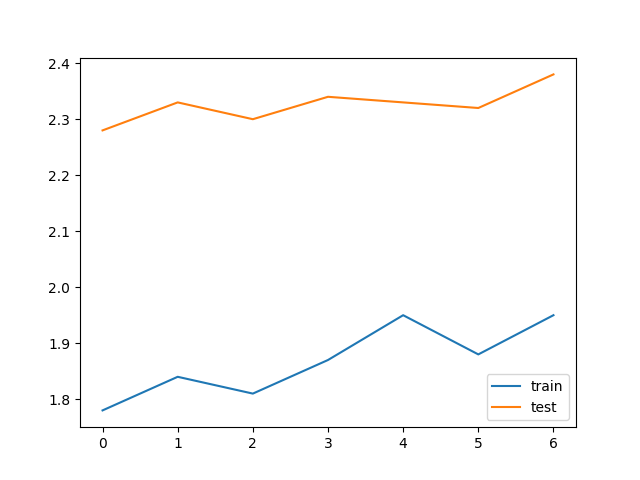

In [15]:
snap_save=os.path.dirname(config_path) + r'\snapshots_saved'
os.mkdir(snap_save)

_, _, snapshotfolder = deeplabcut.return_train_network_path(
    config_path,
    shuffle=1,
    trainingsetindex=0,
)

# iterations = ['500000','450000','400000','350000','300000','250000','200000','150000']
iterations = ['500000','450000','400000','350000','300000','250000','200000']#, '125000', '75000']

snap_keep = len(iterations) # same has the length of iterations list

for i in range(snap_keep):
    deeplabcut.evaluate_network(config_path,Shuffles=[1], plotting=False, gputouse=0)
    for root, dirs, files in os.walk(snapshotfolder):
        for filename in files:
            if iterations[i] in filename:
                shutil.move(root+'/'+filename,snap_save)

combined_path = os.path.dirname(config_path) + r'\evaluation-results\iteration-0\CombinedEvaluation-results.csv'                
df = pd.read_csv(combined_path)
display(df)

train_err = list(df['Train error with p-cutoff'])
test_err = list(df['Test error with p-cutoff'])


x_axis = range(snap_keep)
%matplotlib widget
# plot lines
plt.plot(x_axis, train_err , label = "train")
plt.plot(x_axis, test_err, label = "test")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display
path_to_h5=r"D:\_users\Duarte_Projects\Left_Lateral-Duarte-2022-03-29\evaluation-results\iteration-0\Left_LateralMar29-trainset95shuffle1\DLC_resnet101_Left_LateralMar29shuffle1_150000-snapshot-150000.h5"
results = pd.read_hdf(path_to_h5)
display(results)

### Choose a folder that has all the videos you want to analyze, and it will create a directory per video in the project

In [3]:
import os
from tkinter import Tk  
from tkinter.filedialog import askdirectory

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
left_L = askdirectory(title='Select the folder with the videos you want to analyze', initialdir='D:\_users\Duarte_Projects')

videos_test=[]
for root, dirs, files in os.walk(left_L):
    for filename in files:
        # print(os.path.join(root, filename) + '    ' + filename[-3:])
        if filename[-3:] == 'MP4' or filename[-3:] == 'mp4' or filename[-3:] == 'avi' or filename[-3:] == 'MOV' or filename[-3:] == 'mov':
            videoname=os.path.join(root, filename)
            videos_test.append(videoname)
print(videos_test)

['//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Down_cropped_videos/Left_Diagonal_crop\\HC_12\\HC_12_L_async_DownCrop.mp4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Down_cropped_videos/Left_Diagonal_crop\\HC_12\\HC_12_L_sync_DownCrop.mp4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Down_cropped_videos/Left_Diagonal_crop\\HC_12\\HC_12_R_delay_DownCrop.mp4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Down_cropped_videos/Left_Diagonal_crop\\HC_12\\HC_12_R_synch_DownCrop.mp4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Down_cropped_videos/Left_Diagonal_crop\\HC_13\\HC_13_L_async_DownCrop.mp4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Down_cropped_videos/Left_Diagonal_crop\\HC_13\\HC_13_L_sync_DownCrop.mp4', '//svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Down_cropped_videos/Left_Diagonal_crop\\HC_13\\HC_13_R_async_DownCrop.mp4', '//svfas5.epfl.ch/blanke-lab/Users/

In [4]:
for vid in videos_test:
    file_mp4 = os.path.basename(vid)
    filename = file_mp4[:-15]
    print(filename)
print(len(videos_test))

HC_12_L_asy
HC_12_L_sy
HC_12_R_del
HC_12_R_syn
HC_13_L_asy
HC_13_L_sy
HC_13_R_asy
HC_13_R_sy
HC_5_R_asy
HC_5_R_dela
HC_5_R_sy
HC_8_L_asy
HC_8_L_sy
HC_8_R_asy
HC_8_R_dela
HC_8_R_sy
PD_24_L_asy
PD_24_L_sy
PD_24_R_asy
PD_24_R_delay_
PD_24_R_delay_
PD_24_R_delay_
PD_24_R_sy
PD_28_L_asy
PD_28_L_sy
PD_28_R_asy
PD_28_R_delay_
PD_28_R_delay_
PD_28_R_delay_
PD_28_R_syn
30


## Analysis

In [6]:
#This destinyfolder prevents from creating files in the videos directory in the database
import os
fail = []
videos_folder=os.path.join(os.path.dirname(config_path),'videos')
ll_folder=os.path.join(videos_folder,'LD_crop_Results')
if not os.path.isdir(ll_folder): 
    os.mkdir(ll_folder)
# destiny=os.path.join(videos_folder,'test_videos') _Downcrop.mp4

for vid in videos_test:
    file_mp4 = os.path.basename(vid)
    filename = file_mp4[:-13] 
    if filename[-2:] == 'do':
        filename = filename[:-2]
    destiny=os.path.join(ll_folder,filename)
    
        
    if not os.path.isdir(destiny): 
        os.mkdir(destiny)

        try:
            
            vid = vid.replace('/','\\')
            print(vid)
            scorername = deeplabcut.analyze_videos(config_path,vid, videotype='.mp4', batchsize=1, destfolder = destiny)
            print('Starting to label the video...')
            deeplabcut.create_video_with_all_detections(config_path, vid, videotype='.mp4', destfolder = destiny)
            print('New labeled videos successfully created!')
            deeplabcut.filterpredictions(config_path,vid,shuffle=1, filtertype='arima',ARdegree=5,MAdegree=2,destfolder = destiny)
            deeplabcut.create_labeled_video(config_path,vid, save_frames=True, destfolder=destiny, draw_skeleton = True,filtered = True)
            deeplabcut.plot_trajectories(config_path, vid, destfolder=destiny)
            deeplabcut.plot_trajectories(config_path, vid, destfolder=destiny,filtered=True)
            if len(os.listdir(destiny)) == 0:
                print('****************************The folder was REMOVED because no file was created!******************************')
                os.rmdir(destiny)
                
        except IndexError:
            fail.append(os.path.basename(destiny))
            if len(os.listdir(destiny)) == 0:
                os.rmdir(destiny)
            print('=================== HERE:The video '+ vid +' is not correctly encoded.===============================')

\\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\HC_12\HC_12_L_async_DownCrop.mp4
=================== HERE:The video \\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\HC_12\HC_12_L_async_DownCrop.mp4 is not correctly encoded.===============================
\\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\HC_12\HC_12_L_sync_DownCrop.mp4
=================== HERE:The video \\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\HC_12\HC_12_L_sync_DownCrop.mp4 is not correctly encoded.===============================
\\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\HC_12\HC_12_R_delay_DownCrop.mp4
=================== HERE:The video \\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\HC_12\HC_12_R_dela

\\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\PD_28\PD_28_L_sync_DownCrop.mp4
=================== HERE:The video \\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\PD_28\PD_28_L_sync_DownCrop.mp4 is not correctly encoded.===============================
\\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\PD_28\PD_28_R_async_DownCrop.mp4
=================== HERE:The video \\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\PD_28\PD_28_R_async_DownCrop.mp4 is not correctly encoded.===============================
\\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\PD_28\PD_28_R_delay_01_DownCrop.mp4
=================== HERE:The video \\svfas5.epfl.ch\blanke-lab\Users\Duarte\Data\Old_recordings\Down_cropped_videos\Left_Diagonal_crop\PD_28\PD_28_R_d

In [20]:
#This destinyfolder prevents from creating files in the videos directory in the database
import os
videos_folder=os.path.join(os.path.dirname(config_path),'videos')
ll_folder=os.path.join(videos_folder,'RD_demo_Results')
os.mkdir(ll_folder)
# destiny=os.path.join(videos_folder,'test_videos') _Downcrop.mp4

for vid in videos_test:
    file_mp4 = os.path.basename(vid)
    filename = file_mp4[:-15]
    destiny=os.path.join(ll_folder,filename)
    os.mkdir(destiny)
    
    
    scorername = deeplabcut.analyze_videos(config_path,vid, videotype='.mp4', batchsize=1, destfolder = destiny)
    print('Starting to label the video...')
    deeplabcut.create_video_with_all_detections(config_path, vid, videotype='.mp4', destfolder = destiny)
    print('New labeled videos successfully created!')
    deeplabcut.filterpredictions(config_path,vid,shuffle=1, filtertype='arima',ARdegree=5,MAdegree=2,destfolder = destiny)
    deeplabcut.create_labeled_video(config_path,vid, save_frames=True, destfolder=destiny, draw_skeleton = True,filtered = True)
    deeplabcut.plot_trajectories(config_path, vid, destfolder=destiny)
    deeplabcut.plot_trajectories(config_path, vid, destfolder=destiny,filtered=True)

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12]],
 'all_joints_names': ['finger1',
                      'wrist1',
                      'elbow1',
                      'shoulder1',
                      'finger2',
                      'wrist2',
                      'elbow2',
                      'shoulder2',
                      'chin',
                      'robot_joint',
                      'robot_top',
                      'robot_base',
                      'robot_logo'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ma_RDJun17\\ma_RD_Duarte95shuffle1.pickle',
 'dataset_type': 'multi-animal-imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'D:\\_us

Using snapshot-500000 for model D:/_users/Duarte_Projects/ma_RD-Duarte-2022-06-17\dlc-models\iteration-0\ma_RDJun17-trainset95shuffle1
Activating extracting of PAFs
Starting to analyze %  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_diagonal/PD_02\PD_02_L_asyncdownsampled.mp4
Loading  //svfas5.epfl.ch/blanke-lab/Users/Duarte/Data/Old_recordings/Downsampled_videos_w288/Right_diagonal/PD_02\PD_02_L_asyncdownsampled.mp4
Duration of video [s]:  108.5 , recorded with  30.0 fps!
Overall # of frames:  3255  found with (before cropping) frame dimensions:  512 288
Starting to extract posture from the video(s) with batchsize: 1



 12%|█████████▍                                                                     | 391/3255 [00:14<01:42, 28.02it/s]


 24%|███████████████████                                                            | 787/3255 [00:28<01:27, 28.05it/s]


 36%|████████████████████████████▍                                                 | 1185/3255 [00:42<01:13, 28.34it/s]


 49%|█████████████████████████████████████▉                                        | 1585/3255 [00:56<00:59, 28.25it/s]


 58%|█████████████████████████████████████████████▌                                | 1900/3255 [01:07<00:47, 28.47it/s]

IndexError: list index out of range


 58%|█████████████████████████████████████████████▌                                | 1900/3255 [01:19<00:47, 28.47it/s]

In [ ]:
#It ended up being easier to do it by hand

#This will iterate throughtout the database and remove the temp folders created to do the video analysis
#Doesn't work perfectly when done in the blanke-lab drive

# for root, dirs, files in os.walk(left_L):
#     if 'temp' in os.path.basename(root):
#         rem_list=os.listdir(root)
#         for to_rem in rem_list:
#             path_to_rem=os.path.join(root,to_rem)
#             os.remove(path_to_rem)
#         print('The '+root+' was removed.')
#         os.rmdir(root)
        

In [ ]:
# for vid in videos_test:
#     file_mp4 = os.path.basename(vid)
#     filename = file_mp4[:-15]
#     destiny=os.path.join(ll_folder,filename)
    
#     deeplabcut.analyzeskeleton(config_path, vid, save_as_csv=True, destfolder=destiny)

Choose the videos to make predictions (can be used as test)

In [ ]:
from tkinter import Tk  
from tkinter.filedialog import askopenfilenames

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
videos = askopenfilenames(title='Choose videos to test', initialdir='D:\_users\Duarte_Projects') # show an "Open" dialog box and return the path to the selected file
videos_test=list(videos)

#This can be the same used to label, or new ones
print(videos_test)

## Functions one by one 

In [ ]:
deeplabcut.plot_trajectories(config_path, videos_test, destfolder=destiny)

In [ ]:
#This step takes time, to verify it is running go to the data, and there should be a new temp folder with increasing images
deeplabcut.create_labeled_video(config_path,videos_test, save_frames=True, destfolder=destiny, draw_skeleton = True )
print('New labeled videos successfully created!')

In [ ]:
deeplabcut.analyzeskeleton(config_path, videos_test, save_as_csv=True, destfolder=destiny) # after create label video - info for angle and length of skeleton

Apply filter to see how it works and if it is that different

In [ ]:
deeplabcut.filterpredictions(config_path,videos_test, destfolder=destiny, videotype='.mp4',filtertype= 'spline')

In [ ]:
#This step takes time, to verify it is running go to the data, and there should be a new temp folder with increasing images
deeplabcut.create_labeled_video(config_path,videos_test, save_frames=True, destfolder=destiny, draw_skeleton = True,filtered=True )
print('New labeled videos successfully created!')

EXTRA FUNCTIONS

In [ ]:
deeplabcut.add_new_videos(config_path, ['full path of video 4', 'full path of video 5'], copy_videos=True/False) #done whenever

deeplabcut.extract_save_all_maps(config_path, Indices=[6, 10]) # Done after the evaluation

deeplabcut.filterpredictions(config_path,video_train, videotype='.avi',filtertype= 'arima',ARdegree=5,MAdegree=2) # enhances the filtering around the predictions

deeplabcut.analyzeskeleton(config_path, videos, save_as_csv=True, destfolder=destiny) # after create label video - info for angle and length of skeleton